<a href="https://colab.research.google.com/github/cshah1995/Deep-Learning-MNIST-data/blob/main/MNIST_Image_classification_Simple_Logistic_Regression_model.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Loading the Libraries

In [68]:
import torch as t, torchvision as tv
import torchvision.transforms as transforms
from torchvision.datasets import MNIST
import matplotlib.pyplot as plt
from torchvision.transforms import ToTensor, transforms
%matplotlib inline

#Loading the MNIST Dataset

In [2]:
dtr = MNIST( root = 'data/', download=True)

  0%|          | 0/9912422 [00:00<?, ?it/s]

Extracting data/MNIST/raw/train-images-idx3-ubyte.gz to data/MNIST/raw



  0%|          | 0/28881 [00:00<?, ?it/s]

Extracting data/MNIST/raw/train-labels-idx1-ubyte.gz to data/MNIST/raw



  0%|          | 0/1648877 [00:00<?, ?it/s]

Extracting data/MNIST/raw/t10k-images-idx3-ubyte.gz to data/MNIST/raw



  0%|          | 0/4542 [00:00<?, ?it/s]

Extracting data/MNIST/raw/t10k-labels-idx1-ubyte.gz to data/MNIST/raw



In [3]:
dtst = MNIST(root = 'data/', train=False)

In [64]:
len(dtr) , len(dtst)

(50000, 10000)

In [ ]:
dtr[0]

label: 2


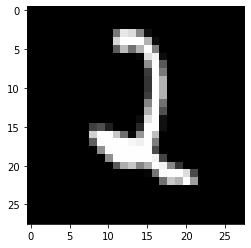

In [70]:
im, lbl = dtr[0]
plt.imshow(im[0], cmap = 'gray')
print('label:', lbl)

In [7]:
dtr = MNIST( root = 'data/',
            train=True,
            transform= transforms.ToTensor())

In [8]:
im_tensor, lbl = dtr[0]
print(im_tensor.shape, lbl)

torch.Size([1, 28, 28]) 5


In [9]:
print('Max value of a pixel is:', t.max(im_tensor), '\n' , 'Min value of a pixel is:', t.min(im_tensor))

print(im_tensor[0,10:15,10:15])


Max value of a pixel is: tensor(1.) 
 Min value of a pixel is: tensor(0.)
tensor([[0.0039, 0.6039, 0.9922, 0.3529, 0.0000],
        [0.0000, 0.5451, 0.9922, 0.7451, 0.0078],
        [0.0000, 0.0431, 0.7451, 0.9922, 0.2745],
        [0.0000, 0.0000, 0.1373, 0.9451, 0.8824],
        [0.0000, 0.0000, 0.0000, 0.3176, 0.9412]])


slice of image with label: 5


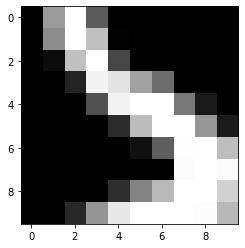

In [10]:
plt.imshow(im_tensor[0,10:20,10:20], cmap = 'gray');
print('slice of image with label:', lbl)

#Splitting the data
* Splitting the data the training data into training and validation dataset for validation purpose.
* We already have the training data labelled as `dtst`

In [11]:
from torch.utils.data import random_split
dtr, dval = random_split(dtr, [50000,10000])

In [12]:
len(dtr) , len(dval), len(dtst)

(50000, 10000, 10000)

* In the below code we use `Dataloader` to create batches of the data that can be used for training as well as for validation in each epoch.

In [13]:
from torch.utils.data import DataLoader

batch_size = 128
dtr_loader = DataLoader(dtr, batch_size, shuffle=True)
dval_loader = DataLoader(dval, batch_size)

#Data Modelling

##Setting up the data

Here we initialize the weights and biases

In [14]:
import torch.nn as nn

input = 28*28
output = 10

model = nn.Linear(input, output)

In [15]:
print(model.weight.shape)
print(model.bias.shape)
model.weight, model.bias

torch.Size([10, 784])
torch.Size([10])


(Parameter containing:
 tensor([[ 0.0232,  0.0025, -0.0216,  ..., -0.0111, -0.0080, -0.0007],
         [ 0.0265,  0.0084,  0.0236,  ...,  0.0342, -0.0063,  0.0133],
         [-0.0288, -0.0196, -0.0146,  ..., -0.0243, -0.0170, -0.0102],
         ...,
         [ 0.0354, -0.0021, -0.0244,  ...,  0.0188,  0.0100,  0.0289],
         [ 0.0332,  0.0078,  0.0168,  ..., -0.0239, -0.0215,  0.0035],
         [-0.0232,  0.0325,  0.0144,  ..., -0.0050, -0.0340,  0.0321]],
        requires_grad=True), Parameter containing:
 tensor([ 0.0147,  0.0321,  0.0143, -0.0084, -0.0284,  0.0191, -0.0161, -0.0049,
         -0.0054,  0.0143], requires_grad=True))

In [16]:
#for images, labels in dtr_loader:
#  print(labels)
#  print(images)
#  break

##The above code doesnt run, as the shape of the images data needs to be flattened.
#A nn layer predicts 1-D o/p from a multi-dim input image, hence the multi-dim o/p needs to be flattened.

* In the below code we reshape the data from (28*28) to 784.
* Note that `-1` is used as a general term since pytorch understands/reads the 1st dimension based on the data that is given as an input.


In [17]:
class MnistModel(nn.Module):
  def __init__(self):
    super().__init__()
    self.linear = nn.Linear(input, output)

  
  def forward(self, xb):
    xb = xb.reshape(-1,784)
    out = self.linear(xb)
    return out


model = MnistModel()


Running the below code flattens the data

In [18]:
model.linear

Linear(in_features=784, out_features=10, bias=True)

In [19]:
model.linear.weight

Parameter containing:
tensor([[-0.0348,  0.0080,  0.0116,  ..., -0.0159,  0.0208, -0.0039],
        [ 0.0353,  0.0036,  0.0016,  ...,  0.0144,  0.0328,  0.0268],
        [ 0.0200, -0.0080,  0.0270,  ...,  0.0354,  0.0077, -0.0126],
        ...,
        [ 0.0146, -0.0208, -0.0201,  ...,  0.0233,  0.0120,  0.0319],
        [ 0.0279, -0.0074,  0.0051,  ...,  0.0247,  0.0344,  0.0235],
        [-0.0114,  0.0131, -0.0339,  ...,  0.0203,  0.0038, -0.0348]],
       requires_grad=True)

In [20]:
for images, labels in dtr_loader:
  outputs = model(images)
  break

print(outputs.shape)
print('sample data:', outputs[:1].data)

torch.Size([128, 10])
sample data: tensor([[-0.0114, -0.0721,  0.0854,  0.0654, -0.3238,  0.1444,  0.1331,  0.2607,
          0.3070,  0.0255]])


In [21]:
import torch.nn.functional as F

In [22]:
probs = F.softmax(outputs, dim =1)
print(probs[:2].data)

tensor([[0.0917, 0.0863, 0.1010, 0.0990, 0.0671, 0.1072, 0.1060, 0.1204, 0.1261,
         0.0952],
        [0.1140, 0.0743, 0.1253, 0.0704, 0.0990, 0.0847, 0.0832, 0.1143, 0.1233,
         0.1116]])


In [23]:
print(t.sum(probs[0]).item())

0.9999999403953552


In [24]:
max_probs, preds = t.max(probs, dim=1)
print(preds)
print(max_probs)

tensor([8, 2, 8, 8, 1, 0, 7, 8, 7, 8, 8, 5, 8, 7, 7, 8, 2, 9, 9, 6, 2, 0, 0, 7,
        2, 8, 8, 7, 7, 8, 7, 0, 0, 3, 7, 9, 3, 6, 7, 7, 7, 8, 8, 8, 0, 6, 6, 8,
        9, 8, 6, 8, 9, 8, 6, 7, 0, 7, 0, 7, 7, 0, 0, 7, 0, 8, 8, 7, 8, 0, 5, 6,
        8, 5, 5, 8, 0, 9, 0, 7, 7, 1, 8, 6, 2, 7, 0, 1, 7, 8, 7, 7, 8, 5, 2, 8,
        7, 8, 7, 5, 0, 7, 8, 8, 8, 7, 7, 5, 6, 2, 7, 0, 0, 0, 8, 9, 6, 9, 7, 6,
        9, 7, 2, 0, 0, 6, 3, 7])
tensor([0.1261, 0.1253, 0.1459, 0.1156, 0.1214, 0.1343, 0.1180, 0.1359, 0.1361,
        0.1307, 0.1372, 0.1282, 0.1445, 0.1420, 0.1183, 0.1214, 0.1435, 0.1235,
        0.1581, 0.1312, 0.1298, 0.1325, 0.1428, 0.1489, 0.1375, 0.1331, 0.1308,
        0.1275, 0.1497, 0.1266, 0.1402, 0.1167, 0.1370, 0.1203, 0.1151, 0.1341,
        0.1168, 0.1295, 0.1253, 0.1490, 0.1446, 0.1399, 0.1326, 0.1280, 0.1383,
        0.1264, 0.1314, 0.1561, 0.1712, 0.1310, 0.1166, 0.1164, 0.1319, 0.1263,
        0.1364, 0.1463, 0.1220, 0.1188, 0.1276, 0.1345, 0.1624, 0.1393, 0.1526,
       

In [25]:
labels

tensor([1, 3, 1, 4, 3, 8, 1, 1, 6, 6, 3, 7, 1, 4, 4, 2, 3, 0, 0, 7, 5, 0, 6, 2,
        9, 8, 1, 3, 6, 4, 4, 3, 3, 5, 7, 4, 6, 5, 3, 2, 8, 1, 2, 8, 4, 3, 7, 2,
        0, 3, 9, 9, 5, 7, 4, 2, 3, 6, 5, 2, 6, 5, 5, 0, 5, 4, 1, 4, 1, 1, 7, 4,
        3, 7, 7, 2, 4, 0, 0, 4, 9, 4, 2, 7, 7, 1, 5, 7, 0, 1, 6, 6, 4, 7, 4, 1,
        6, 3, 7, 7, 8, 9, 8, 1, 9, 7, 2, 9, 4, 6, 7, 5, 3, 5, 1, 0, 6, 0, 8, 0,
        9, 6, 0, 3, 8, 2, 6, 4])

In [26]:
preds

tensor([8, 2, 8, 8, 1, 0, 7, 8, 7, 8, 8, 5, 8, 7, 7, 8, 2, 9, 9, 6, 2, 0, 0, 7,
        2, 8, 8, 7, 7, 8, 7, 0, 0, 3, 7, 9, 3, 6, 7, 7, 7, 8, 8, 8, 0, 6, 6, 8,
        9, 8, 6, 8, 9, 8, 6, 7, 0, 7, 0, 7, 7, 0, 0, 7, 0, 8, 8, 7, 8, 0, 5, 6,
        8, 5, 5, 8, 0, 9, 0, 7, 7, 1, 8, 6, 2, 7, 0, 1, 7, 8, 7, 7, 8, 5, 2, 8,
        7, 8, 7, 5, 0, 7, 8, 8, 8, 7, 7, 5, 6, 2, 7, 0, 0, 0, 8, 9, 6, 9, 7, 6,
        9, 7, 2, 0, 0, 6, 3, 7])

In [27]:
t.tensor(t.sum(preds == labels).item())

tensor(11)

In [28]:
def accuracy(outputs, labels):
  _, preds = t.max(outputs, dim=1)
  return (t.tensor(t.sum(preds == labels).item()/ len(preds) * 100))

In [29]:
accuracy(outputs,labels)

tensor(8.5938)

* Accuracy is good as an evaluation metric for humans to read, interpret and understand.
* Accuracy is not continuous and cannot be differentiated and hence it cannot be used as a loss function.
* To minimize the loss, we use cross-entropy as a loss-function, since it is continuous and also it is differentiable.

In [30]:
loss_fn = F.cross_entropy
loss = loss_fn(outputs, labels)
print(loss)

tensor(2.3512, grad_fn=<NllLossBackward0>)


##Training and evaluating the data

In [31]:
def fit(epochs, lr, model, dtr_loader, dval_loader, opt_func = t.optim.SGD):

  optimizer = opt_func(model.parameters(), lr)
  history = []

  for epoch in range(epochs):

    for batch in dtr_loader:

      loss = model.training_step(batch)
      loss.backward()
      optimizer.step()
      optimizer.zero_grad()


    result = evaluate(model, dval_loader)
    model.epoch_end(epoch, result)
    history.append(result)

  return history

In [32]:
def evaluate(model, dval_loader):
  outputs = [model.validation_step(batch) for batch in dval_loader]
  return model.validation_epoch_end(outputs)

In [33]:
class MnistModel(nn.Module):
  def __init__(self):
    super().__init__()
    self.linear = nn.Linear(input, output)

  
  def forward(self, xb):
    xb = xb.reshape(-1,784)
    out = self.linear(xb)
    return out

  def training_step(self, batch):
    images, labels = batch
    out = self(images)
    loss = F.cross_entropy(out, labels)
    return loss

  def validation_step(self, batch):
    images, labels = batch
    out = self(images)
    loss = F.cross_entropy(out, labels)
    acc = accuracy(out, labels)
    return { 'val_loss': loss , 'val_acc': acc}

  def validation_epoch_end(self, outputs):
    batch_losses = [x['val_loss'] for x in outputs]
    epoch_loss = t.stack(batch_losses).mean()
    batch_acc = [x['val_acc'] for x in outputs]
    epoch_acc = t.stack(batch_acc).mean()
    return{'val_loss':epoch_loss.item(), 'val_acc':epoch_acc.item()}

  
  def epoch_end(self, epoch, result):
    print('Epoch [{}], val_loss: {:.4f}, val_acc: {:.4f}'.format(epoch, result['val_loss'], result['val_acc']))



model = MnistModel()

In [34]:
r0 = evaluate(model, dval_loader)
r0

{'val_acc': 8.475079536437988, 'val_loss': 2.3298420906066895}

In [35]:
history0 = fit(5, 0.001, model, dtr_loader, dval_loader)
history0

Epoch [0], val_loss: 1.9479, val_acc: 64.7053
Epoch [1], val_loss: 1.6745, val_acc: 74.4759
Epoch [2], val_loss: 1.4721, val_acc: 77.4723
Epoch [3], val_loss: 1.3200, val_acc: 78.9557
Epoch [4], val_loss: 1.2034, val_acc: 79.9545


[{'val_acc': 64.7052993774414, 'val_loss': 1.9479314088821411},
 {'val_acc': 74.47586822509766, 'val_loss': 1.6744952201843262},
 {'val_acc': 77.4723129272461, 'val_loss': 1.4721163511276245},
 {'val_acc': 78.95569610595703, 'val_loss': 1.319960594177246},
 {'val_acc': 79.95450592041016, 'val_loss': 1.2033658027648926}]

In [36]:
history1 = fit(5, 0.001, model, dtr_loader, dval_loader)
history2 = fit(7, 0.001, model, dtr_loader, dval_loader)
history3 = fit(9, 0.001, model, dtr_loader, dval_loader)


Epoch [0], val_loss: 1.1121, val_acc: 80.6566
Epoch [1], val_loss: 1.0391, val_acc: 81.4280
Epoch [2], val_loss: 0.9795, val_acc: 82.0312
Epoch [3], val_loss: 0.9299, val_acc: 82.5356
Epoch [4], val_loss: 0.8880, val_acc: 82.9905
Epoch [0], val_loss: 0.8522, val_acc: 83.2476
Epoch [1], val_loss: 0.8212, val_acc: 83.5938
Epoch [2], val_loss: 0.7940, val_acc: 83.8608
Epoch [3], val_loss: 0.7701, val_acc: 83.9695
Epoch [4], val_loss: 0.7487, val_acc: 84.1871
Epoch [5], val_loss: 0.7297, val_acc: 84.3552
Epoch [6], val_loss: 0.7124, val_acc: 84.5332
Epoch [0], val_loss: 0.6968, val_acc: 84.7211
Epoch [1], val_loss: 0.6825, val_acc: 84.8596
Epoch [2], val_loss: 0.6695, val_acc: 85.0771
Epoch [3], val_loss: 0.6574, val_acc: 85.1760
Epoch [4], val_loss: 0.6463, val_acc: 85.3145
Epoch [5], val_loss: 0.6361, val_acc: 85.4430
Epoch [6], val_loss: 0.6265, val_acc: 85.5518
Epoch [7], val_loss: 0.6176, val_acc: 85.6210
Epoch [8], val_loss: 0.6092, val_acc: 85.7990


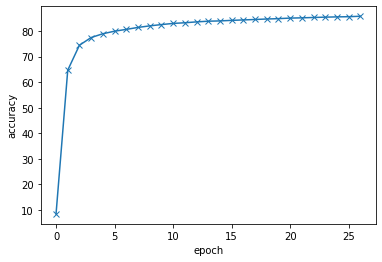

In [37]:
history = [r0] + history0 + history1 + history2 + history3
accuracies = [result['val_acc'] for result in history]
plt.plot(accuracies, '-x');
plt.xlabel('epoch');
plt.ylabel('accuracy');


##Testing the data on model

In [38]:
dtest = MNIST(root = 'data/', train = False, transform=transforms.ToTensor())

shape: torch.Size([1, 28, 28])
label : 7


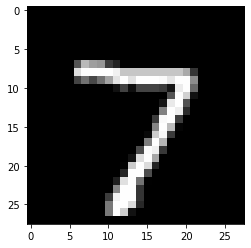

In [53]:
img, lbl = dtest[0]
plt.imshow(img[0], cmap = 'gray')
print('shape:' , img.shape)
print('label :' , lbl)

In [40]:
def predict_img(img, model):
  xb = img.unsqueeze(0)
  yb = model(xb)
  _,preds = t.max(yb, dim=1)
  return preds[0].item()

##Testing a few images

actual_label: 3 predicted_label 3


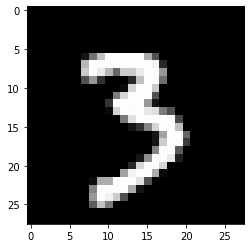

In [55]:
img, lbl = dtest[30]
print('actual_label:', lbl , 'predicted_label', predict_img(img, model))
plt.imshow(img[0], cmap = 'gray');

actual_label: 2 predicted_label 8


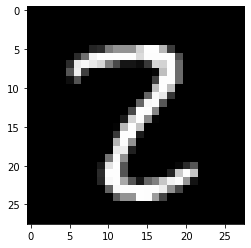

In [54]:
img, lbl = dtest[1839]
print('actual_label:', lbl , 'predicted_label', predict_img(img, model))
plt.imshow(img[0], cmap = 'gray');

In [56]:
dtest_loader = DataLoader(dtest, batch_size = 256)
result = evaluate(model,dtest_loader)
result

{'val_acc': 86.69921875, 'val_loss': 0.5803562998771667}

#Saving the model

In [57]:
t.save(model.state_dict(), 'MNIST_logistic.pth')

In [59]:
new_model = MnistModel()
new_model.load_state_dict(t.load('MNIST_logistic.pth'))

<All keys matched successfully>

In [ ]:
new_model.state_dict()

* Loaded model works successfully!

In [1]:
test_result = evaluate(new_model,dtest_loader)
print(result)
print(test_result)

NameError: ignored